In [ ]:
pip install pandas numpy matplotlib scikit-learn tensorflow dash requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:


import requests

# Step 1: Define a list of popular stock symbols
stock_options = {
    'Amazon': 'AMZN',
    'Google': 'GOOGL',
    'Tesla': 'TSLA',
    'Apple': 'AAPL',
    'Microsoft': 'MSFT'
}

# Display available stock options
print("Choose a stock to predict:")
for key in stock_options:
    print(f"- {key} ({stock_options[key]})")

# Step 2: Get user input
chosen_stock_name = input("Enter the name of the stock you want to predict (e.g., Amazon, Google): ").strip()

# Validate the choice
if chosen_stock_name in stock_options:
    stock_symbol = stock_options[chosen_stock_name]
    print(f"You've chosen {chosen_stock_name} with the symbol {stock_symbol}.")
else:
    print("Invalid stock name. Please choose from the available options.")
    exit()

# Step 3: Verify and Fetch Real-Time Stock Data using Finnhub API
API_KEY = 'crc0ap9r01qtpc71duj0crc0ap9r01qtpc71dujg'  # Replace with your actual API key
url = f'https://finnhub.io/api/v1/quote?symbol={stock_symbol}&token={API_KEY}'

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    current_price = data['c']
    print(f"Current price of {chosen_stock_name} ({stock_symbol}) is ${current_price}")
else:
    print("Failed to fetch data. Please check the stock symbol and API key.")

    ## Here you have to print Amazon


Choose a stock to predict:
- Amazon (AMZN)
- Google (GOOGL)
- Tesla (TSLA)
- Apple (AAPL)
- Microsoft (MSFT)
Enter the name of the stock you want to predict (e.g., Amazon, Google): Google 
You've chosen Google with the symbol GOOGL.
Current price of Google (GOOGL) is $156.45


In [ ]:
#Fetch Historical Data

In [ ]:
import yfinance as yf

# Define the stock symbol
stock_symbol = "GOOGL"

# Download historical hourly data for the last 6 month
data = yf.download(tickers=stock_symbol, period='1y', interval='1h')

# Display the first few rows to understand the structure
print(data.head())

[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-05 09:30:00-04:00  135.440002  135.970001  134.580093  134.990997   
2023-09-05 10:30:00-04:00  134.990005  135.800003  134.729996  135.520004   
2023-09-05 11:30:00-04:00  135.520004  135.729996  135.270004  135.335007   
2023-09-05 12:30:00-04:00  135.339996  135.669998  135.309998  135.539993   
2023-09-05 13:30:00-04:00  135.539993  136.389999  135.449997  136.319397   

                            Adj Close   Volume  
Datetime                                        
2023-09-05 09:30:00-04:00  134.990997  4798841  
2023-09-05 10:30:00-04:00  135.520004  2453850  
2023-09-05 11:30:00-04:00  135.335007  1140926  
2023-09-05 12:30:00-04:00  135.539993  1182223  
2023-09-05 13:30:00-04:00  136.319397  1777229  


In [ ]:
# Preprocessing the Data

In [ ]:
# Check the type of data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-09-05 09:30:00-04:00,135.440002,135.970001,134.580093,134.990997,134.990997,4798841
2023-09-05 10:30:00-04:00,134.990005,135.800003,134.729996,135.520004,135.520004,2453850
2023-09-05 11:30:00-04:00,135.520004,135.729996,135.270004,135.335007,135.335007,1140926
2023-09-05 12:30:00-04:00,135.339996,135.669998,135.309998,135.539993,135.539993,1182223
2023-09-05 13:30:00-04:00,135.539993,136.389999,135.449997,136.319397,136.319397,1777229
...,...,...,...,...,...,...
2024-09-04 11:30:00-04:00,157.119995,157.308701,156.789993,157.139999,157.139999,1825159
2024-09-04 12:30:00-04:00,157.149994,157.565002,156.741592,156.779999,156.779999,1422239
2024-09-04 13:30:00-04:00,156.785004,156.949997,155.961594,156.539993,156.539993,1606662


In [ ]:
# Preprocessing the Data

In [ ]:
data=data.reset_index()
data

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-09-05 09:30:00-04:00,135.440002,135.970001,134.580093,134.990997,134.990997,4798841
1,2023-09-05 10:30:00-04:00,134.990005,135.800003,134.729996,135.520004,135.520004,2453850
2,2023-09-05 11:30:00-04:00,135.520004,135.729996,135.270004,135.335007,135.335007,1140926
3,2023-09-05 12:30:00-04:00,135.339996,135.669998,135.309998,135.539993,135.539993,1182223
4,2023-09-05 13:30:00-04:00,135.539993,136.389999,135.449997,136.319397,136.319397,1777229
...,...,...,...,...,...,...,...
1751,2024-09-04 11:30:00-04:00,157.119995,157.308701,156.789993,157.139999,157.139999,1825159
1752,2024-09-04 12:30:00-04:00,157.149994,157.565002,156.741592,156.779999,156.779999,1422239
1753,2024-09-04 13:30:00-04:00,156.785004,156.949997,155.961594,156.539993,156.539993,1606662
1754,2024-09-04 14:30:00-04:00,156.539993,156.800003,156.179993,156.774994,156.774994,1846232


In [ ]:
#drop Datetime and Adj Close coulums from data
data=data.drop(['Datetime','Adj Close'],axis=1)
data

,Open,High,Low,Close,Volume
0,135.440002,135.970001,134.580093,134.990997,4798841
1,134.990005,135.800003,134.729996,135.520004,2453850
2,135.520004,135.729996,135.270004,135.335007,1140926
3,135.339996,135.669998,135.309998,135.539993,1182223
4,135.539993,136.389999,135.449997,136.319397,1777229
...,...,...,...,...,...
1751,157.119995,157.308701,156.789993,157.139999,1825159
1752,157.149994,157.565002,156.741592,156.779999,1422239
1753,156.785004,156.949997,155.961594,156.539993,1606662
1754,156.539993,156.800003,156.179993,156.774994,1846232


Text(0.5, 1.0, 'Amazon Close Price History')

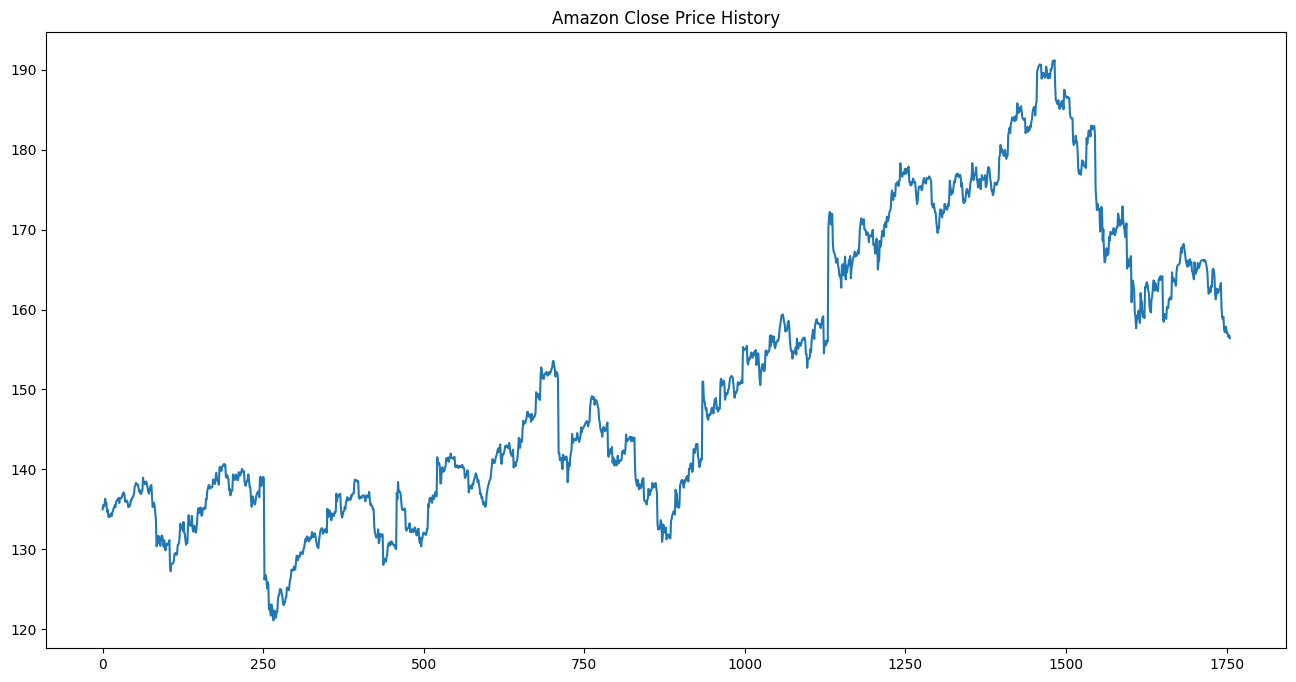

In [ ]:
# plot Close values of data
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')
# Add a title
plt.title('Amazon Close Price History')


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if necessary
data = data.fillna(method='ffill')  # Forward fill

# Create additional features (e.g., moving average)
#data['Moving_Avg_3h'] = data['Close'].rolling(window=3).mean()


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


<ipython-input-13-65f17ef6c261>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill


In [ ]:
data.shape
data

,Open,High,Low,Close,Volume
0,135.440002,135.970001,134.580093,134.990997,4798841
1,134.990005,135.800003,134.729996,135.520004,2453850
2,135.520004,135.729996,135.270004,135.335007,1140926
3,135.339996,135.669998,135.309998,135.539993,1182223
4,135.539993,136.389999,135.449997,136.319397,1777229
...,...,...,...,...,...
1751,157.119995,157.308701,156.789993,157.139999,1825159
1752,157.149994,157.565002,156.741592,156.779999,1422239
1753,156.785004,156.949997,155.961594,156.539993,1606662
1754,156.539993,156.800003,156.179993,156.774994,1846232


In [ ]:
#Split data into training and testing intime series
data_training=pd.DataFrame(data['Close'][0:int(len(data)*0.80)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.80):int(len(data))])

In [ ]:
print(data_training.shape)
print(data_testing.shape)

(1404, 1)
(352, 1)


In [ ]:
data_training

,Close
0,134.990997
1,135.520004
2,135.335007
3,135.539993
4,136.319397
...,...
1399,179.679993
1400,180.070007
1401,179.959900
1402,179.509995


In [ ]:
data_testing

,Close
1404,179.479996
1405,179.959900
1406,179.160004
1407,178.849197
1408,179.229996
...,...
1751,157.139999
1752,156.779999
1753,156.539993
1754,156.774994


In [ ]:
# Scale the values
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.23328279],
       [0.24217965],
       [0.23906835],
       ...,
       [0.98957111],
       [0.98200459],
       [0.97729556]])

In [ ]:
# Assuming y_predicted is a 1D array (e.g., shape (n,))
#y_predicted_original = scaler.inverse_transform(data_training_array.reshape(-1, 1))
#y_predicted_original = y_predicted_original.flatten()  # To convert back to 1D array if needed
#y_predicted_original

In [ ]:
X_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 386ms/step - loss: 0.1100
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 314ms/step - loss: 0.0118
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - loss: 0.0105
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - loss: 0.0098
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 349ms/step - loss: 0.0083
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 493ms/step - loss: 0.0110
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - loss: 0.0089
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - loss: 0.0086
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 302ms/step - loss: 0.0083
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - loss: 0.0075
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - loss: 0.0067
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 328ms/step - loss: 0.0063
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - loss: 0.0057
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - loss: 0.0071
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [ ]:
model.save('keras_model2.h5')

In [ ]:
data_testing.head()

,Close
1404,179.479996
1405,179.959900
1406,179.160004
1407,178.849197
1408,179.229996


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
#final_df=past_100_days.append(data_testing,ignore_index=True)

In [ ]:
import pandas as pd

# Combine past_100_days and data_testing using pd.concat
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head()

,Close
0,172.509995
1,172.500000
2,172.460007
3,171.529999
4,172.220001


In [ ]:
imput_data=scaler.fit_transform(final_df)
imput_data

array([[0.46304274],
       [0.46275529],
       [0.46160507],
       [0.43485763],
       [0.4547024 ],
       [0.4495253 ],
       [0.45355174],
       [0.48346284],
       [0.46390551],
       [0.47282162],
       [0.46448085],
       [0.46275529],
       [0.48304023],
       [0.47483462],
       [0.49985606],
       [0.56658048],
       [0.5447227 ],
       [0.51624972],
       [0.53350615],
       [0.5207883 ],
       [0.5299111 ],
       [0.54731104],
       [0.56629303],
       [0.56025622],
       [0.57865981],
       [0.58886964],
       [0.58354903],
       [0.59253666],
       [0.58613736],
       [0.58009792],
       [0.58700058],
       [0.58786336],
       [0.57807877],
       [0.5447227 ],
       [0.55824014],
       [0.5185506 ],
       [0.48892739],
       [0.48633906],
       [0.49841839],
       [0.49122828],
       [0.51624972],
       [0.53293082],
       [0.53724471],
       [0.52602816],
       [0.51912593],
       [0.50848428],
       [0.53019547],
       [0.556

In [ ]:
imput_data.shape

(452, 1)

In [ ]:
X_test=[]
y_test=[]

for i in range(100,imput_data.shape[0]):
    X_test.append(imput_data[i-100:i])
    y_test.append(imput_data[i,0])

In [ ]:
X_test,y_test=np.array(X_test),np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(352, 100, 1)
(352,)


In [ ]:
y_test

array([0.663503  , 0.67730525, 0.65429989, 0.64536097, 0.65631289,
       0.65602545, 0.73136316, 0.74192715, 0.75697441, 0.73823423,
       0.77178602, 0.77796985, 0.79436307, 0.78803574, 0.78659763,
       0.79522585, 0.78070169, 0.79838951, 0.78501601, 0.79004918,
       0.84526916, 0.83060106, 0.81090023, 0.82858805, 0.81679617,
       0.82997131, 0.8346275 , 0.81377645, 0.79191868, 0.79004918,
       0.7854474 , 0.78515996, 0.79062407, 0.73828031, 0.7553928 ,
       0.74173142, 0.76008366, 0.74374486, 0.75395469, 0.74805875,
       0.76387708, 0.75884391, 0.77983891, 0.78760435, 0.81521456,
       0.82585578, 0.83175172, 0.83002616, 0.80155318, 0.83987658,
       0.85044583, 0.96117368, 0.96678173, 0.976992  , 0.97986778,
       0.98518839, 0.98418211, 0.98303145, 0.93385135, 0.95340824,
       0.94391724, 0.95441496, 0.94837507, 0.93830918, 0.93787779,
       0.97727945, 0.96289923, 0.94492396, 0.93488967, 0.95010107,
       0.93586435, 0.93758991, 0.96721312, 0.96692568, 0.97267

In [ ]:
X_test

array([[[0.46304274],
        [0.46275529],
        [0.46160507],
        ...,
        [0.67730525],
        [0.66436578],
        [0.65631289]],

       [[0.46275529],
        [0.46160507],
        [0.43485763],
        ...,
        [0.66436578],
        [0.65631289],
        [0.663503  ]],

       [[0.46160507],
        [0.43485763],
        [0.4547024 ],
        ...,
        [0.65631289],
        [0.663503  ],
        [0.67730525]],

       ...,

       [[0.08743153],
        [0.08282975],
        [0.0772217 ],
        ...,
        [0.02041966],
        [0.02099499],
        [0.01064122]],

       [[0.08282975],
        [0.0772217 ],
        [0.06945626],
        ...,
        [0.02099499],
        [0.01064122],
        [0.00373856]],

       [[0.0772217 ],
        [0.06945626],
        [0.11245341],
        ...,
        [0.01064122],
        [0.00373856],
        [0.01049728]]])

In [ ]:
#Making Predictions
y_predicted=model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step


In [ ]:
y_predicted.shape

(352, 1)

In [ ]:
#y_predicted

In [ ]:
y_test.shape

(352,)

In [ ]:
import numpy as np

# Assuming y_test is a NumPy array
y_test_reshaped = y_test.reshape(-1, 1)
y_test_reshaped.shape

(352, 1)

In [ ]:
#y_test

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
y_predicted_Original = scaler.inverse_transform(y_predicted)
y_predicted_Original

array([[178.73396],
       [178.94592],
       [179.07803],
       [179.123  ],
       [179.08041],
       [179.0041 ],
       [178.94534],
       [179.01335],
       [179.20581],
       [179.5021 ],
       [179.87004],
       [180.28595],
       [180.73135],
       [181.1922 ],
       [181.65135],
       [182.08958],
       [182.49059],
       [182.80911],
       [183.04506],
       [183.19698],
       [183.28398],
       [183.39532],
       [183.56151],
       [183.75552],
       [183.96501],
       [184.16298],
       [184.34488],
       [184.5133 ],
       [184.64244],
       [184.69301],
       [184.65186],
       [184.53214],
       [184.38185],
       [184.2472 ],
       [184.0888 ],
       [183.92195],
       [183.75697],
       [183.63647],
       [183.56343],
       [183.54375],
       [183.56206],
       [183.61938],
       [183.70158],
       [183.81361],
       [183.95537],
       [184.1232 ],
       [184.31172],
       [184.51501],
       [184.7235 ],
       [184.89305],


In [ ]:
# Reshape y_test to be a 2D array
y_test_reshaped = y_test.reshape(-1, 1)
y_test_reshaped.shape

(352, 1)

In [ ]:


# Convert the scaled y_test back to its original scale
y_test_Original = scaler.inverse_transform(y_test_reshaped)

# Optionally, flatten the array
y_test_Original = y_test_Original.flatten()
y_test_Original= y_test_Original.reshape(-1, 1)
# Print or use the original y_test
print("Original y_test:", y_test_Original)


Original y_test: [[179.47999573]
 [179.9598999 ]
 [179.16000366]
 [178.84919739]
 [179.22999573]
 [179.22000122]
 [181.8394928 ]
 [182.20680237]
 [182.72999573]
 [182.07839966]
 [183.24499512]
 [183.46000671]
 [184.02999878]
 [183.80999756]
 [183.75999451]
 [184.05999756]
 [183.55499268]
 [184.16999817]
 [183.70500183]
 [183.88000488]
 [185.80000305]
 [185.28999329]
 [184.60499573]
 [185.22000122]
 [184.80999756]
 [185.26809692]
 [185.42999268]
 [184.70500183]
 [183.94500732]
 [183.88000488]
 [183.72000122]
 [183.71000671]
 [183.8999939 ]
 [182.08000183]
 [182.67500305]
 [182.19999695]
 [182.83810425]
 [182.27000427]
 [182.625     ]
 [182.41999817]
 [182.97000122]
 [182.79499817]
 [183.5249939 ]
 [183.79499817]
 [184.75500488]
 [185.125     ]
 [185.33000183]
 [185.27000427]
 [184.27999878]
 [185.61250305]
 [185.97999573]
 [189.83000183]
 [190.0249939 ]
 [190.38000488]
 [190.47999573]
 [190.66499329]
 [190.63000488]
 [190.58999634]
 [188.88000488]
 [189.55999756]
 [189.22999573]
 [189.5

In [ ]:
#scaler.scale_

In [ ]:
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(data)


In [ ]:
#scale_factor=1/0.02382938
#y_predicted=y_predicted*scale_factor
#y_test=y_test*scale_factor

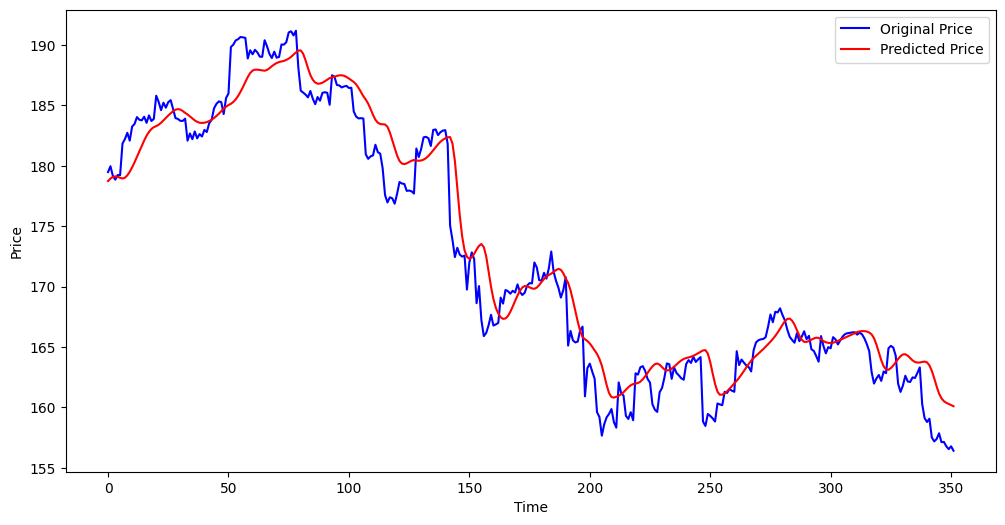

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_Original,'b',label='Original Price')
plt.plot(y_predicted_Original,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Incorporate Accuracy Metrics:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_test_original_reshape and y_predicted_original are already defined
mse = mean_squared_error(y_test_Original, y_predicted_Original)
mae = mean_absolute_error(y_test_Original, y_predicted_Original)
rmse = np.sqrt(mse)

# Calculate MAPE
# Avoid division by zero by adding a small constant (e.g., 1e-10)
mape = np.mean(np.abs((y_test_Original - y_predicted_Original) / (y_test_Original + 1e-10))) * 100

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}%")


Mean Squared Error: 5.732770268641286
Mean Absolute Error: 1.8044030449607156
Root Mean Squared Error: 2.394320418958433
Mean Absolute Percentage Error: 1.0539900929974133%


In [ ]:
#Forecast Future Prices:

In [ ]:
last_sequence = imput_data[-100:]  # Last 100 values for the next prediction
last_sequence = np.expand_dims(last_sequence, axis=0)

next_prediction = model.predict(last_sequence)
# Rescale the prediction back to the original scale
next_prediction_Original = scaler.inverse_transform(next_prediction)

print(f"Next prediction in original scale: {next_prediction_Original}")
print(f"Next hour predicted price: ${next_prediction_Original[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
Next prediction in original scale: [[159.99971]]
Next hour predicted price: $159.9997100830078


In [ ]:
# Start with the last 100 values from your input data
last_sequence2 = imput_data[-100:]
last_sequence2 = np.expand_dims(last_sequence2, axis=0)

# List to store the 12-hour predictions
predictions_12_hours = []

# Forecast for 12 hours
for _ in range(12):
    # Predict the next hour
    next_prediction2 = model.predict(last_sequence2)

    # Rescale the prediction back to the original scale
    next_prediction_Original2 = scaler.inverse_transform(next_prediction2)

    # Append the prediction to the list
    predictions_12_hours.append(next_prediction_Original2[0][0])

    # Update last_sequence by removing the oldest value and appending the predicted value
    # Convert to the same format as last_sequence for further prediction
    last_sequence2 = np.append(last_sequence2[:, 1:, :], np.expand_dims(next_prediction2, axis=2), axis=1)

# Print the 12-hour forecast
for i, price in enumerate(predictions_12_hours, 1):
    print(f"Predicted price for hour {i}: ${price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted price for hour 1: $160.00
Predicted price for hour 2: $159.97
Predicted price for hour 3: $160.03
Predicted price for hour 4: $160.18
Predicted price for hour 5: $160.41
Predicted price for hour 6: $160.69
Predicted price for hour 7: $160.99
Predicted price for hour 8: $161.29
Predicted price for hour 9: $161.59
Predicted price for hour 10: $161.88
Predicted price for hour 11: $162.16
Predicted price for hour 12: $162.43


In [ ]:
#Create the Dashboard with Dash

In [ ]:
pip install dash


In [ ]:
#############################################################

In [ ]:
pip install dash plotly numpy pandas scikit-learn


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data (replace with your actual data)
time = np.arange(len(y_test_Original))
original_price = y_test_Original.flatten()
predicted_price = y_predicted_Original.flatten()

# Last 100 values for the next prediction (for next hour)
last_sequence = imput_data[-100:]
last_sequence = np.expand_dims(last_sequence, axis=0)

# Make prediction for the next hour
next_prediction = model.predict(last_sequence)
next_prediction_Original = scaler.inverse_transform(next_prediction)

# Forecast for 12 hours
last_sequence2 = imput_data[-100:]
last_sequence2 = np.expand_dims(last_sequence2, axis=0)
predictions_12_hours = []
for _ in range(12):
    next_prediction2 = model.predict(last_sequence2)
    next_prediction_Original2 = scaler.inverse_transform(next_prediction2)
    predictions_12_hours.append(next_prediction_Original2[0][0])
    last_sequence2 = np.append(last_sequence2[:, 1:, :], np.expand_dims(next_prediction2, axis=2), axis=1)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Stock Price Prediction Dashboard"),
    dcc.Graph(
        id='price-graph',
        figure={
            'data': [
                go.Scatter(x=time, y=original_price, mode='lines', name='Original Price'),
                go.Scatter(x=time, y=predicted_price, mode='lines', name='Predicted Price')
            ],
            'layout': go.Layout(
                title='Stock Prices vs Predicted Prices',
                xaxis={'title': 'Time'},
                yaxis={'title': 'Price'},
                height=600
            )
        }
    ),
    html.Div([
        html.H3("Next Hour Prediction:"),
        html.Div(id='next-prediction', children=f"${next_prediction_Original[0][0]:.2f}")
    ]),
    html.Div([
        html.H3("12-Hour Forecast:"),
        html.Ul([html.Li(f"Hour {i+1}: ${pred:.2f}") for i, pred in enumerate(predictions_12_hours)])
    ])
])

# Define a callback for updating next hour prediction (if needed)
@app.callback(
    Output('next-prediction', 'children'),
    Input('price-graph', 'relayoutData')
)
def update_next_prediction(_):
    return f"${next_prediction_Original[0][0]:.2f}"

# Run the app on local server
if __name__ == '__main__':
    app.run_server(debug=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data (replace with your actual data)
time = np.arange(len(y_test_Original))
original_price = y_test_Original.flatten()
predicted_price = y_predicted_Original.flatten()

# Last 100 values for the next prediction (for next hour)
last_sequence = imput_data[-100:]
last_sequence = np.expand_dims(last_sequence, axis=0)

# Make prediction for the next hour
next_prediction = model.predict(last_sequence)
next_prediction_Original = scaler.inverse_transform(next_prediction)

# Forecast for 12 hours
last_sequence2 = imput_data[-100:]
last_sequence2 = np.expand_dims(last_sequence2, axis=0)
predictions_12_hours = []
for _ in range(12):
    next_prediction2 = model.predict(last_sequence2)
    next_prediction_Original2 = scaler.inverse_transform(next_prediction2)
    predictions_12_hours.append(next_prediction_Original2[0][0])
    last_sequence2 = np.append(last_sequence2[:, 1:, :], np.expand_dims(next_prediction2, axis=2), axis=1)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Stock Price Prediction Dashboard"),
    dcc.Graph(
        id='price-graph',
        figure={
            'data': [
                go.Scatter(x=time, y=original_price, mode='lines', name='Original Price'),
                go.Scatter(x=time, y=predicted_price, mode='lines', name='Predicted Price')
            ],
            'layout': go.Layout(
                title='Stock Prices vs Predicted Prices',
                xaxis={'title': 'Time'},
                yaxis={'title': 'Price'},
                height=600
            )
        }
    ),
    html.Div([
        html.H3("Next Hour Prediction:"),
        html.Div(id='next-prediction', children=f"${next_prediction_Original[0][0]:.2f}")
    ]),
    html.Div([
        html.H3("12-Hour Forecast:"),
        html.Ul([html.Li(f"Hour {i+1}: ${pred:.2f}") for i, pred in enumerate(predictions_12_hours)])
    ])
])

# Define a callback for updating next hour prediction (if needed)
@app.callback(
    Output('next-prediction', 'children'),
    Input('price-graph', 'relayoutData')
)
def update_next_prediction(_):
    return f"${next_prediction_Original[0][0]:.2f}"

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
# Run the app on local server
if __name__ == '__main__':
    app.run_server(debug=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Mean Squared Error (MSE): 5.732770268641286
Mean Absolute Error (MAE): 1.8044030449607156
Root Mean Squared Error (RMSE): 2.394320418958433
Mean Absolute Percentage Error (MAPE): 1.0539900929974133%


<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('keras_model2.h5')

# Sample data (replace with your actual data)
time = np.arange(len(y_test_Original))
original_price = y_test_Original.flatten()
predicted_price = y_predicted_Original.flatten()

# Last 100 values for the next prediction (for next hour)
last_sequence = imput_data[-100:]
last_sequence = np.expand_dims(last_sequence, axis=0)

# Make prediction for the next hour
next_prediction = model.predict(last_sequence)
next_prediction_Original = scaler.inverse_transform(next_prediction)

# Forecast for 12 hours
last_sequence2 = imput_data[-100:]
last_sequence2 = np.expand_dims(last_sequence2, axis=0)
predictions_12_hours = []
for _ in range(12):
    next_prediction2 = model.predict(last_sequence2)
    next_prediction_Original2 = scaler.inverse_transform(next_prediction2)
    predictions_12_hours.append(next_prediction_Original2[0][0])
    last_sequence2 = np.append(last_sequence2[:, 1:, :], np.expand_dims(next_prediction2, axis=2), axis=1)

# Calculate metrics
mse = mean_squared_error(original_price, predicted_price)
mae = mean_absolute_error(original_price, predicted_price)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((original_price - predicted_price) / (original_price + 1e-10))) * 100

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Stock Price Prediction Dashboard"),
    dcc.Graph(
        id='price-graph',
        figure={
            'data': [
                go.Scatter(x=time, y=original_price, mode='lines', name='Original Price'),
                go.Scatter(x=time, y=predicted_price, mode='lines', name='Predicted Price')
            ],
            'layout': go.Layout(
                title='Stock Prices vs Predicted Prices',
                xaxis={'title': 'Time'},
                yaxis={'title': 'Price'},
                height=600
            )
        }
    ),
    html.Div([
        html.H3("Next Hour Prediction:"),
        html.Div(id='next-prediction', children=f"${next_prediction_Original[0][0]:.2f}")
    ]),
    html.Div([
        html.H3("12-Hour Forecast:"),
        html.Ul([html.Li(f"Hour {i+1}: ${pred:.2f}") for i, pred in enumerate(predictions_12_hours)])
    ])
])

# Define a callback for updating next hour prediction (if needed)
@app.callback(
    Output('next-prediction', 'children'),
    Input('price-graph', 'relayoutData')
)
def update_next_prediction(_):
    return f"${next_prediction_Original[0][0]:.2f}"

# Run the app on local server
if __name__ == '__main__':
    app.run_server(debug=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Mean Squared Error (MSE): 5.732770268641286
Mean Absolute Error (MAE): 1.8044030449607156
Root Mean Squared Error (RMSE): 2.394320418958433
Mean Absolute Percentage Error (MAPE): 1.0539900929974133%


<IPython.core.display.Javascript object>